In [1]:
install.packages("ggplot2")

library(ggplot2)


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'ggplot2' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.3:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/4.3/PACKAGES'"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"


In [2]:
mit_df<-read.csv('R_Preprocessed_Metro_Interstate_Traffic_Volume.csv')
# i have preprocessed the the Metro_Interstate_Traffic_Volume.csv file in the RandomForest_R File


In [3]:
head(mit_df)

,X,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,day_of_week,month,temp_rain_interaction,⋯,weather_description_smoke,weather_description_snow,weather_description_SQUALLS,weather_description_thunderstorm,weather_description_thunderstorm.with.drizzle,weather_description_thunderstorm.with.heavy.rain,weather_description_thunderstorm.with.light.drizzle,weather_description_thunderstorm.with.light.rain,weather_description_thunderstorm.with.rain,weather_description_very.heavy.rain
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,40,5545,9,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,75,4516,10,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,90,4767,11,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,90,5026,12,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,75,4918,13,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,1,5181,14,3,10,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# Removing the column 'X' 
mit_df$'X' <- NULL


In [5]:
str(mit_df)

'data.frame':	48204 obs. of  60 variables:
 $ temp                                                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ rain_1h                                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h                                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all                                             : int  40 75 90 90 75 1 1 1 20 20 ...
 $ traffic_volume                                         : int  5545 4516 4767 5026 4918 5181 5584 6015 5791 4770 ...
 $ hour                                                   : int  9 10 11 12 13 14 15 16 17 18 ...
 $ day_of_week                                            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ month                                                  : int  10 10 10 10 10 10 10 10 10 10 ...
 $ temp_rain_interaction                                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ holiday_0                                              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday_

In [6]:
install.packages("caret")

library(caret)

Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'caret' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.3:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/4.3/PACKAGES'"
Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice



In [7]:

X <- mit_df[, !(names(mit_df) == "traffic_volume")]
y <- mit_df$traffic_volume


In [8]:
set.seed(42)
trainIndex <- createDataPartition(y, p = 0.7, list = FALSE) 

X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]


In [9]:

lr_model <- lm(y_train ~ ., data = X_train)

In [10]:

summary(lr_model)


Call:
lm(formula = y_train ~ ., data = X_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5162.2 -1640.9   -83.9  1527.0  4956.9 

Coefficients: (14 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              2.716e+02  5.090e+02
temp                                                     2.395e+02  1.505e+01
rain_1h                                                 -7.551e+02  1.945e+03
snow_1h                                                         NA         NA
clouds_all                                               4.178e+00  5.028e-01
hour                                                     9.216e+01  1.477e+00
day_of_week                                              7.278e+01  5.006e+00
month                                                   -7.390e+00  2.992e+00
temp_rain_interaction                                   -1.053e-01  4.239e-02
holiday_0           

In [11]:
y_train_pred <- predict(lr_model, newdata = X_train)

y_test_pred <- predict(lr_model, newdata = X_test)


Warning message in predict.lm(lr_model, newdata = X_train):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(lr_model, newdata = X_test):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


In [12]:
# MSE for training and testing data
train_mse <- mean((y_train - y_train_pred)^2)
test_mse <- mean((y_test - y_test_pred)^2)

# R2 for training and testing data
train_r2 <- cor(y_train, y_train_pred)^2
test_r2 <- cor(y_test, y_test_pred)^2

cat(sprintf("Training MSE: %.2f, R²: %.2f\n", train_mse, train_r2))
cat(sprintf("Testing MSE: %.2f, R²: %.2f", test_mse, test_r2))


Training MSE: 3346348.86, R²: 0.15
Testing MSE: 19240873.01, R²: 0.00

In [13]:
library(Metrics)

#  RMSE
rmse_lr<- sqrt(test_mse)
#  MAE
mae_lr<- mae(y_test,y_test_pred)

print(paste("Root Mean Squared Error (RMSE):", rmse_lr))
print(paste("Mean Absolute Error (MAE):", mae_lr))

Warning message:
"package 'Metrics' was built under R version 4.3.3"

Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




[1] "Root Mean Squared Error (RMSE): 4386.4419537627"
[1] "Mean Absolute Error (MAE): 1644.74651488082"


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


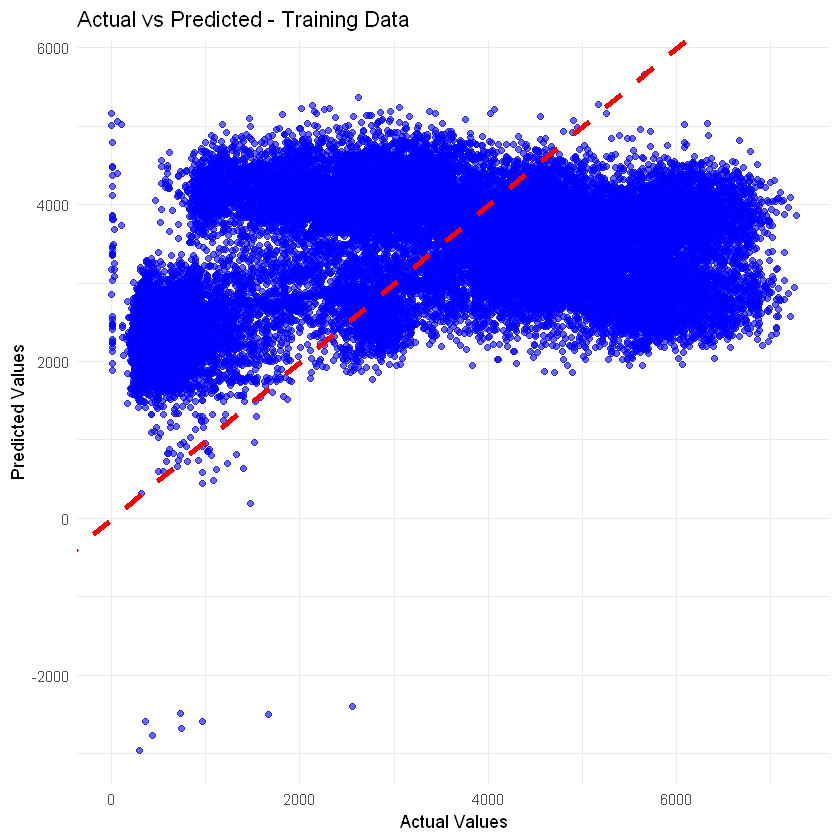

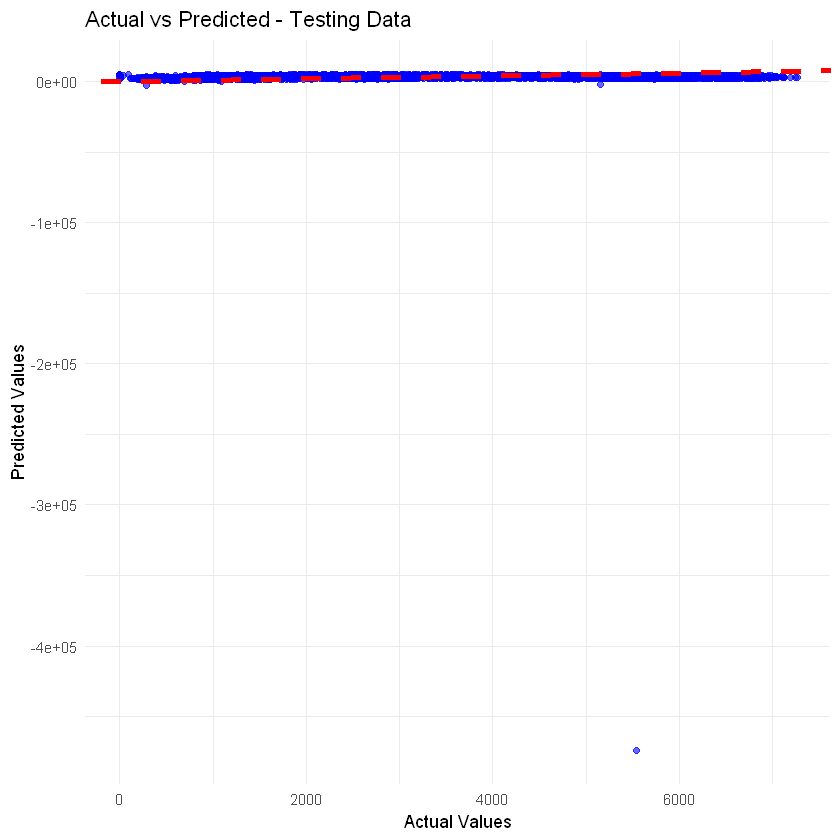

In [14]:
plot_predictions <- function(y_true, y_pred, title) {
  data <- data.frame(Actual = y_true, Predicted = y_pred)

  p <- ggplot(data, aes(x = Actual, y = Predicted)) +
    geom_point(alpha = 0.6, color = "blue") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red", size = 1.5) +
    ggtitle(title) +
    xlab("Actual Values") +
    ylab("Predicted Values") +
    theme_minimal()
  print(p)
}

plot_predictions(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_predictions(y_test, y_test_pred, "Actual vs Predicted - Testing Data")
